In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
ROOT_FILE = Path.cwd().parent
DATA_FILE = ROOT_FILE / 'base_de_dados'/'mxmh_survey_results.csv'
DATA_FRAME = pd.read_csv(DATA_FILE)

In [4]:
DATA_FRAME.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [5]:
DATA_FRAME.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


Text(0.5, 1.0, 'Nível de ansiedade dos participantes')

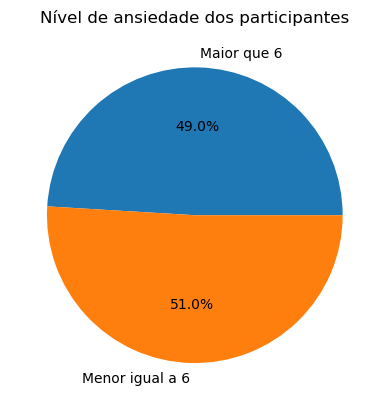

In [6]:
nivel_de_ansiedade_sup = DATA_FRAME[DATA_FRAME['Anxiety'] > 6].shape[0]

nivel_de_ansiedade_inf = DATA_FRAME[DATA_FRAME['Anxiety'] <= 6].shape[0]

plt.pie([nivel_de_ansiedade_sup, nivel_de_ansiedade_inf], labels=['Maior que 6', 'Menor igual a 6'], autopct='%1.1f%%')

plt.title('Nível de ansiedade dos participantes')

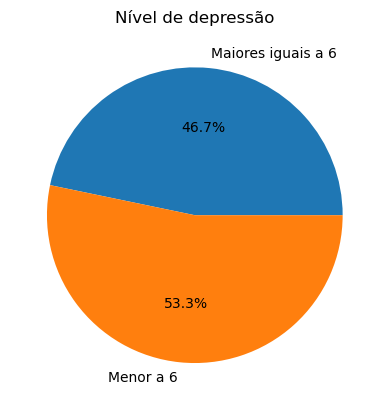

In [7]:
nivel_de_depressao_sup = DATA_FRAME[DATA_FRAME['Depression'] >=6].shape[0]

nivel_de_depressao_inf = DATA_FRAME[DATA_FRAME['Depression'] < 6].shape[0]

plt.pie([nivel_de_depressao_sup, nivel_de_depressao_inf], labels=['Maiores iguais a 6', 'Menor a 6'], autopct='%1.1f%%')

plt.title('Nível de depressão')

plt.show()


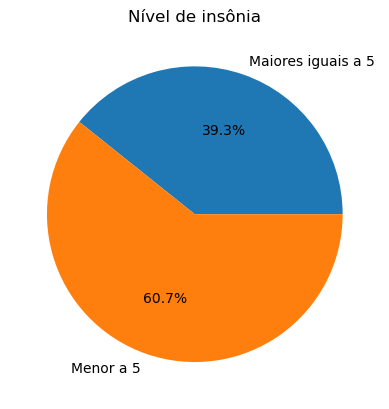

In [8]:
nivel_de_insonia_sup = DATA_FRAME[DATA_FRAME['Insomnia'] >= 5].shape[0]

nivel_de_insonia_inf = DATA_FRAME[DATA_FRAME['Insomnia'] < 5].shape[0]


plt.pie([nivel_de_insonia_sup, nivel_de_insonia_inf], labels=['Maiores iguais a 5', 'Menor a 5'], autopct='%1.1f%%')

plt.title('Nível de insônia')

plt.show()

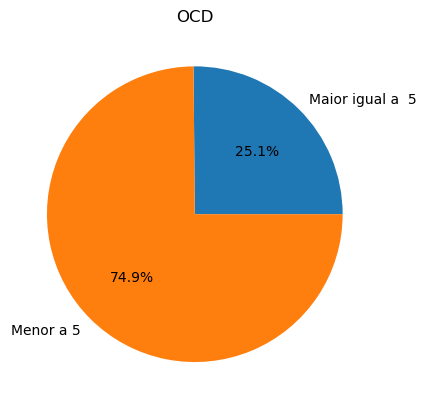

In [9]:
ocd_maior_que_cinco = DATA_FRAME[DATA_FRAME['OCD'] >= 5].shape[0]

ocd_menor_que_cinco = DATA_FRAME[DATA_FRAME['OCD'] < 5].shape[0]

plt.pie([ocd_maior_que_cinco, ocd_menor_que_cinco], labels=['Maior igual a  5', 'Menor a 5'], autopct='%1.1f%%',)

plt.title('OCD')

plt.show()

In [10]:
idade = DATA_FRAME['Age'].value_counts()
idade

Age
18.0    85
19.0    61
17.0    59
21.0    52
16.0    44
        ..
39.0     1
73.0     1
72.0     1
69.0     1
89.0     1
Name: count, Length: 61, dtype: int64

In [11]:
insonia_e_ansiedade = DATA_FRAME[(DATA_FRAME['Anxiety'] > 6) & (DATA_FRAME['Insomnia'] > 5)]

insonia_e_ansiedade.shape[0]

144

In [12]:
ansiedade = DATA_FRAME[DATA_FRAME['Anxiety'] > 6].shape[0]
ansiedade

361

<BarContainer object of 12 artists>

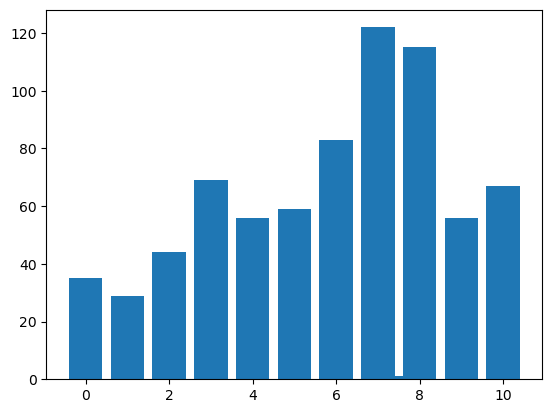

In [13]:
distribuicao_ansiedade = DATA_FRAME['Anxiety'].value_counts()
plt.bar(distribuicao_ansiedade.index, distribuicao_ansiedade.values)

<BarContainer object of 12 artists>

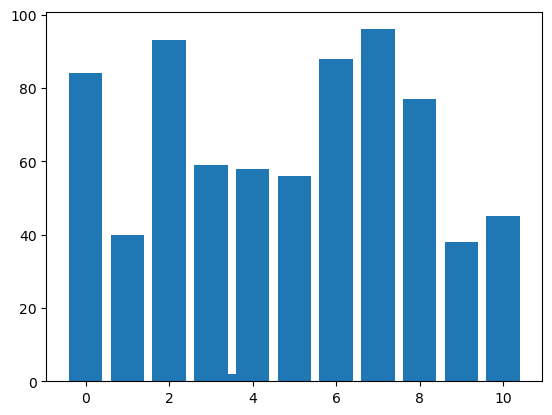

In [14]:
dist_depressao = DATA_FRAME['Depression'].value_counts()
plt.bar(dist_depressao.index, dist_depressao.values)

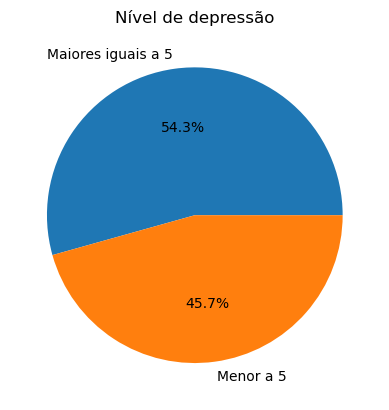

In [15]:
nivel_de_depressao_sup = DATA_FRAME[DATA_FRAME['Depression'] >=5].shape[0]

nivel_de_depressao_inf = DATA_FRAME[DATA_FRAME['Depression'] < 5].shape[0]

plt.pie([nivel_de_depressao_sup, nivel_de_depressao_inf], labels=['Maiores iguais a 5', 'Menor a 5'], autopct='%1.1f%%')

plt.title('Nível de depressão')

plt.show()


[]

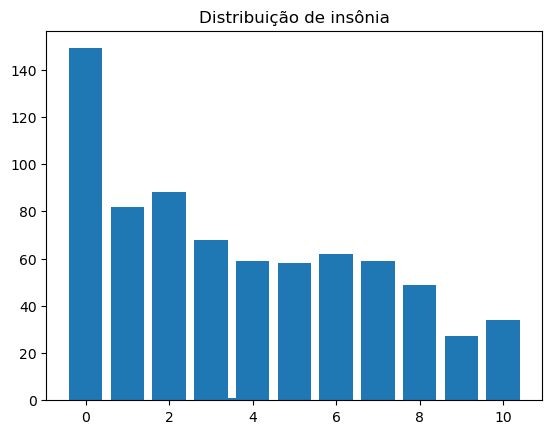

In [32]:
dist_insonia = DATA_FRAME['Insomnia'].value_counts()
plt.title('Distribuição de insônia')
plt.bar(dist_insonia.index, dist_insonia.values)
plt.plot()

([<matplotlib.patches.Wedge at 0x7faba55104d0>,
 [Text(0.08911322826118409, 1.096384436476946, 'Maiores  a 3'),
  Text(-0.08911333091210306, -1.0963844281335584, 'Menor igual a 3')],
 [Text(0.048607215415191314, 0.5980278744419704, '47.4%'),
  Text(-0.04860727140660166, -0.5980278698910318, '52.6%')])

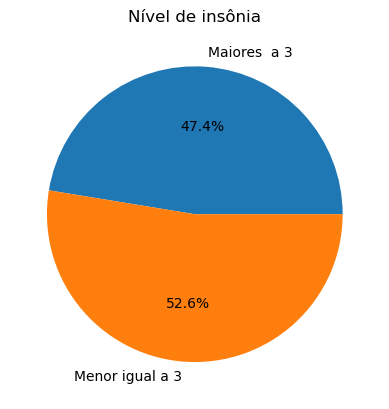

In [33]:
nivel_de_insonia_inf = DATA_FRAME[DATA_FRAME['Insomnia'] <= 3].shape[0]
nivel_de_insonia_sup = DATA_FRAME[DATA_FRAME['Insomnia'] > 3].shape[0]

plt.title('Nível de insônia')
plt.pie([nivel_de_insonia_sup, nivel_de_insonia_inf], labels=['Maiores  a 3', 'Menor igual a 3'], autopct='%1.1f%%')

In [31]:
nivel_de_insonia_sup

349